In [134]:
import numpy as np
from numpy.random import poisson
from scipy import optimize
from matplotlib import pyplot as plt
%matplotlib inline


# FF chi2
def chi2(t, d, aa):
    return np.sum((np.dot(aa,t)-d)**2)

# FF Poisson
def pois(t, d, aa):
    return -np.sum(d*np.log(np.dot(aa,t))-np.dot(aa,t))

# FF Poisson with > 0 requirement
def pois_reg(t, d, aa):
    if np.any(t<0):
        return np.inf
    return -np.sum(d*np.log(np.dot(aa,t))-np.dot(aa,t))

# UF iterative
def itunf(nit, d, p, aa):
    if nit == 0:
        return p
    uu = (np.copy(aa)*p/np.sum(p)).T
    uu /= np.sum(uu, axis=0)
    p = np.dot(uu,d)

    return itunf(nit-1, d, p, aa)

def plot(d, tauhat, fout):
    plt.plot(d, 'k+', label=r'$d$')
    plt.plot(tauhat, 'o', label=r'$\hat{\tau}$')
    plt.xlabel('Bin')
    plt.ylabel('N')
    plt.legend()
    plt.savefig(fout, dpi=300)

In [123]:
# FF matrix
A = np.array([[2/3., 0, 0],
              [1/3., 2/3., 0],
              [0,1/3.,1]])
Ainv = np.linalg.inv(A)

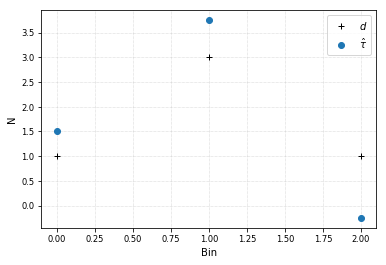

In [124]:
d = np.asarray([1,3,1])
res = optimize.minimize(chi2, [1,1,1], args=(d, A))
plot(d, res.x, 'chi2.png')

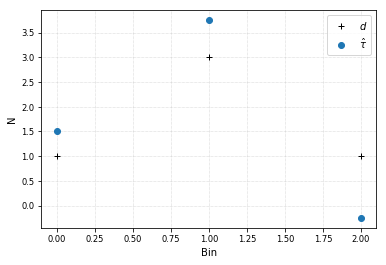

In [125]:
d = np.asarray([1,3,1])
res = optimize.minimize(pois, [1,1,1], args=(d, A))
plot(d, res.x, 'pois.png')

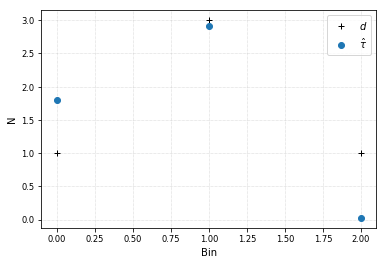

In [126]:
d = np.asarray([1,3,1])
res = optimize.minimize(pois_reg, [1,1,1], args=(d, A))
plot(d, res.x, 'pois_reg.png')

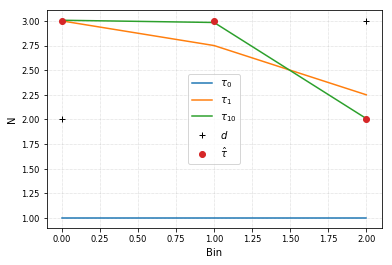

In [118]:
d = np.asarray([2.,3.,3.])
[plt.plot(itunf(it, d, np.ones(d.size)), label=r'$\tau_{{{}}}$'.format(it)) for it in [0,1,10]]
plot(d, np.dot(Ainv,d), 'itunf.png')

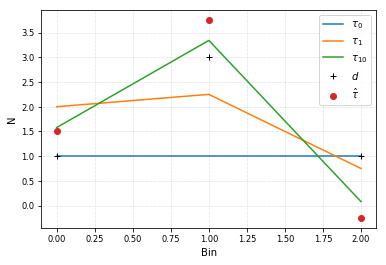

In [144]:
d = np.asarray([1.,3.,1.])
[plt.plot(itunf(it, d, np.ones(d.size), A), label=r'$\tau_{{{}}}$'.format(it)) for it in [0,1,10]]
plot(d, np.dot(Ainv,d), 'itunf_2.png')

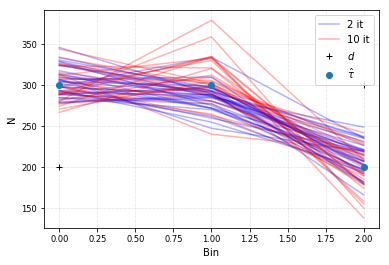

In [170]:
d = np.asarray([200,300.,300.])
for i in range(30):
    s = poisson(d)
    for nit, color in zip([2, 10], ['b','r']):
        label= '{} it'.format(nit) if i == 0 else None
        plt.plot(itunf(nit, s, np.ones(d.size), A), color=color, alpha=0.3, label=label)
plot(d, np.dot(Ainv,d), 'itunf_err.png')

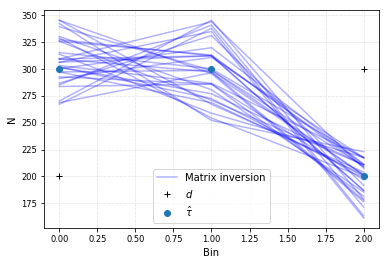

In [171]:
for i in range(30):
    s = poisson(d)
    label = 'Matrix inversion' if i == 0 else None
    plt.plot(np.dot(Ainv, s), color='b', alpha=0.3, label=label)
plot(d, np.dot(Ainv,d), 'ivunf_err.png')

In [ ]:
def generate_mc():
    